<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/Global_Street_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Import necessary modules and reading the csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Global_Street_Food/global_street_food.csv')

**Preprocessing**

In [11]:
print('CSV Data Head')
print(df.head())
print('\nData Description')
print(df.describe())
print('\nChecking for null values')
print(df.notnull().sum())
print('\nData Info')
print(df.info())

CSV Data Head
     Dish Name   Country Region/City  \
0     Takoyaki     Japan       Osaka   
1     Vada Pav     India      Mumbai   
2  Funnel Cake       USA       Texas   
3   Kathi Roll     India     Kolkata   
4     Pad Thai  Thailand     Bangkok   

                                         Ingredients  \
0  Octopus, Flour Batter, Bonito Flakes, Green On...   
1                 Potato, Spices, Bread Bun, Chutney   
2                                 Batter, Sugar, Oil   
3           Flatbread, Egg, Chicken, Onions, Chutney   
4    Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts   

                                         Description Cooking Method  \
0  Crispy and hot, often served with sauces or ch...          Fried   
1  Crispy and hot, often served with sauces or ch...          Fried   
2  Crispy and hot, often served with sauces or ch...          Fried   
3         Charred to perfection with a smoky flavor.        Grilled   
4     Quickly tossed in a hot pan with bold flavors. 

In [3]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

total = country_counts['Count'].sum()

country_counts['Percentage'] = (country_counts['Count'] / total) * 100

country_counts


,Country,Count,Percentage
0,Japan,832,18.488889
1,Thailand,722,16.044444
2,India,682,15.155556
3,Mexico,660,14.666667
4,Turkey,650,14.444444
5,USA,621,13.800000
6,Lebanon,118,2.622222
7,South Africa,58,1.288889
8,Egypt,57,1.266667
9,Nigeria,51,1.133333


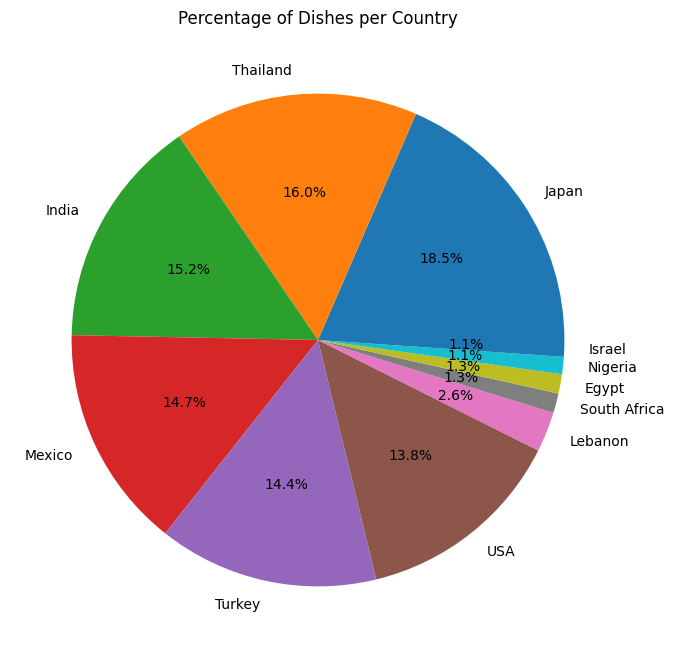

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(country_counts['Percentage'], labels=country_counts['Country'], autopct='%1.1f%%')
plt.title('Percentage of Dishes per Country')
plt.show()


In [5]:
dish_name = df['Dish Name'].unique()
print(dish_name)

['Takoyaki' 'Vada Pav' 'Funnel Cake' 'Kathi Roll' 'Pad Thai' 'Pani Puri'
 'Taiyaki' 'Gözleme' 'Kokoreç' 'Roti Sai Mai' 'Yakisoba' 'Quesadilla'
 'Elote' 'Hot Dog' 'Tacos al Pastor' 'Simit' 'Moo Ping'
 'Philly Cheesesteak' 'Falafel' 'Manakish' 'Shawarma' 'Okonomiyaki'
 'Bunny Chow' 'Suya' 'Koshari']


In [6]:
dish_name.size

25

In [7]:
df.size

36000

In [8]:
df[df['Dish Name']=='Takoyaki']

,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,3.28,No
25,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,4.20,No
93,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,2.46,No
112,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,4.21,No
133,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,4.24,No
...,...,...,...,...,...,...,...,...
3945,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,0.41,No
3954,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,1.65,No
3962,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,2.45,No
3970,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,4.76,No


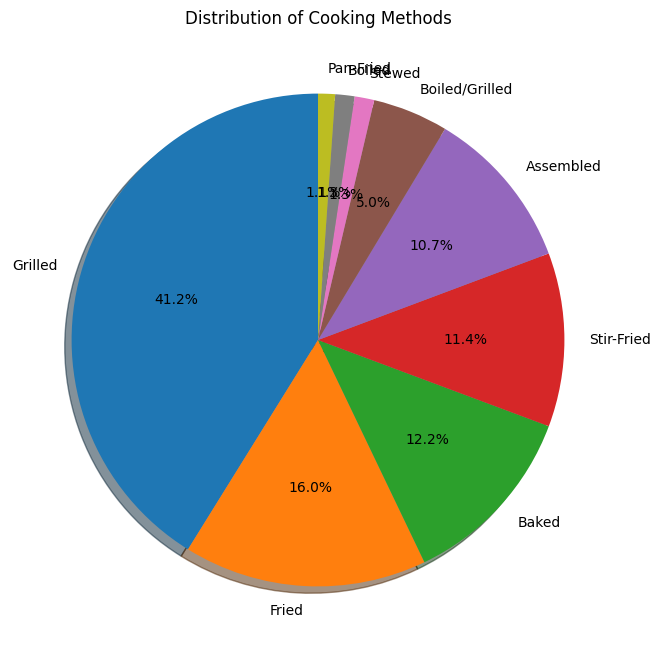

In [9]:
method_counts = df['Cooking Method'].value_counts()

plt.figure(figsize=(8, 8))
method_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Cooking Methods')
plt.ylabel('')
plt.show()

<ipython-input-16-783d35921887>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Typical Price (USD)', y='Dish Name', data=df, palette='pastel')


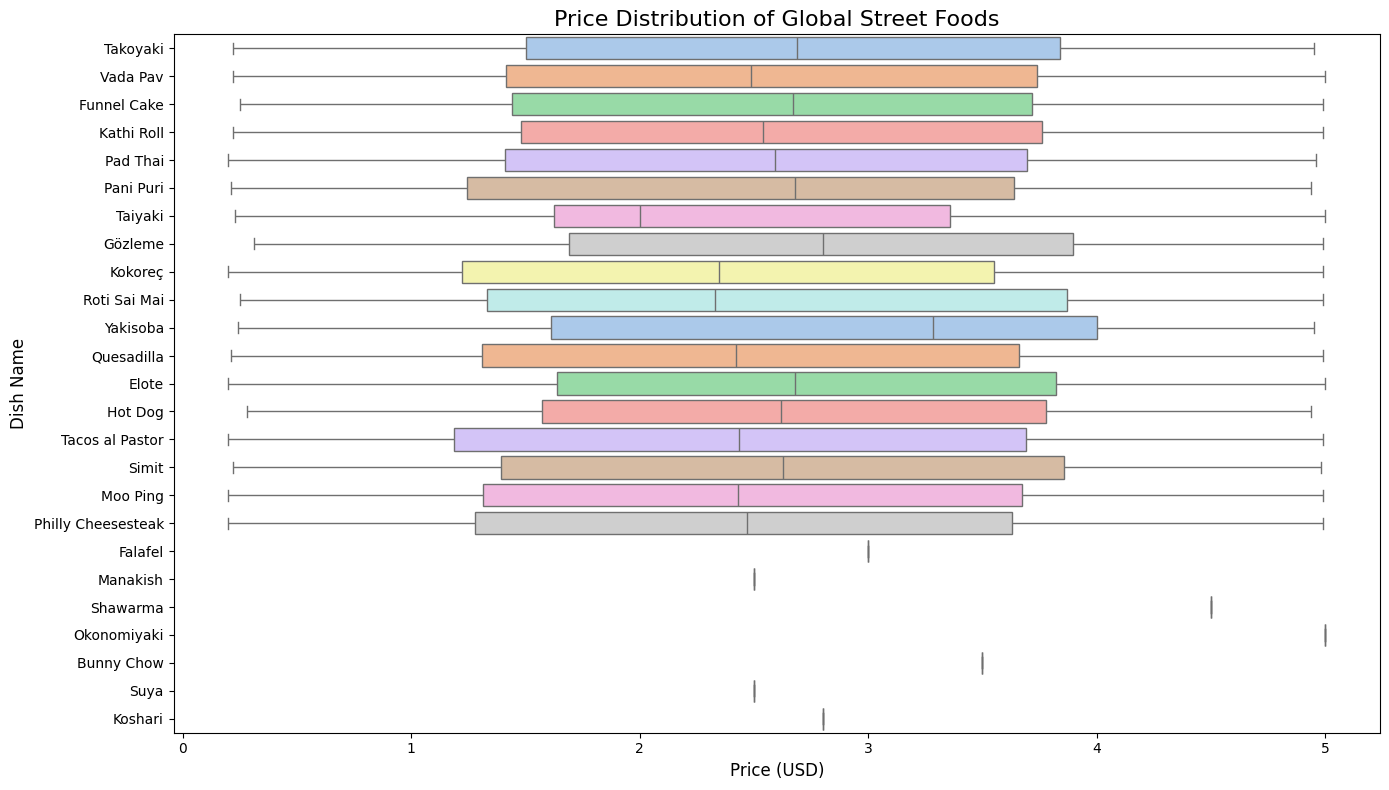

In [16]:
import seaborn as sns
plt.figure(figsize=(14, 8))

sns.boxplot(x='Typical Price (USD)', y='Dish Name', data=df, palette='pastel')

plt.title('Price Distribution of Global Street Foods', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Dish Name', fontsize=12)
plt.tight_layout()

plt.show()